# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

desc = pd.read_excel('../data/proshares_analysis_data.xlsx')
hedge_funds = pd.read_excel('../data/proshares_analysis_data.xlsx', sheet_name = 'hedge_fund_series', index_col = 0)
merrill_factors = pd.read_excel('../data/proshares_analysis_data.xlsx', sheet_name = 'merrill_factors', index_col = 0)
other_data = pd.read_excel('../data/proshares_analysis_data.xlsx', sheet_name = 'other_data', index_col = 0)
print(hedge_funds.head)
print(merrill_factors.head)
print(other_data.head)


<bound method NDFrame.head of             HFRIFWI Index  MLEIFCTR Index  MLEIFCTX Index  HDG US Equity  \
2011-08-31      -0.032149       -0.025588       -0.025689      -0.027036   
2011-09-30      -0.038903       -0.032414       -0.032593      -0.032466   
2011-10-31       0.026858        0.043593        0.043320       0.050531   
2011-11-30      -0.013453       -0.012142       -0.012431      -0.028608   
2011-12-31      -0.004479        0.001938        0.001796       0.012875   
...                   ...             ...             ...            ...   
2024-05-31       0.014100        0.010610        0.010280       0.011225   
2024-06-30      -0.000300        0.001292        0.001114      -0.001986   
2024-07-31       0.012700        0.023803        0.023166       0.024381   
2024-08-31       0.002500       -0.000733       -0.000766      -0.002413   
2024-09-30       0.012300        0.009165        0.008996       0.007448   

            QAI US Equity  
2011-08-31      -0.006489  
2

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [194]:
hf_stats = pd.DataFrame(columns = hedge_funds.columns)
# print(hf_stats.head)
# hf = hedge_funds.drop([hedge_funds.columns[0]], axis =1).fillna(0)
# print(hf.head)
# hf_return = hf.pct_change()
# print(hf_return.head)

hf_stats.loc['mean'] = hedge_funds.mean()*12
hf_stats.loc['vol'] = hedge_funds.std()*np.sqrt(12)
hf_stats.loc['sharpe'] = hf_stats.loc['mean']/hf_stats.loc['vol']
hf_stats

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
mean,0.048295,0.036286,0.034605,0.024812,0.025653
vol,0.059476,0.056136,0.055980,0.058408,0.050009
sharpe,0.812004,0.646398,0.618172,0.424805,0.512971


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [195]:
# hf = hedge_funds.drop([hedge_funds.columns[0]], axis =1)
hf_stats.loc['skew'] = hedge_funds.skew()
hf_stats.loc['kurtosis'] = hedge_funds.kurtosis()
hf_stats.loc['VaR 0.05'] = hedge_funds.quantile(0.05)
hf_stats.loc['cVaR 0.05'] = hedge_funds[hedge_funds <= hf_stats.loc['VaR 0.05']].mean()
hf_stats

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
mean,0.048295,0.036286,0.034605,0.024812,0.025653
vol,0.059476,0.056136,0.055980,0.058408,0.050009
sharpe,0.812004,0.646398,0.618172,0.424805,0.512971
skew,-0.963318,-0.265394,-0.251279,-0.254201,-0.434775
kurtosis,5.763074,1.631580,1.595863,1.759250,1.605934
VaR 0.05,-0.024293,-0.028189,-0.028095,-0.030932,-0.017895
cVaR 0.05,-0.037478,-0.035857,-0.035816,-0.037575,-0.032695


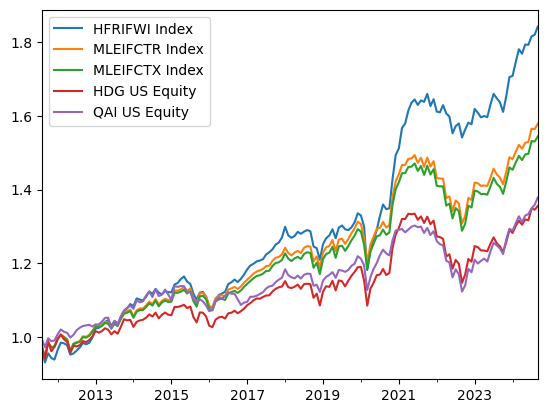

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Max Drawdown,-0.115473,-0.124302,-0.124388,-0.14072,-0.137716
Peak Date,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00
Trough Date,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00
Recovery Date,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00,2024-09-30 00:00:00


In [196]:
cumulative_returns = (1 + hedge_funds).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
cumulative_returns.plot()
plt.show()
def calcdrawdown(x):
    max_drawdown = drawdown[x.name].min()
    peak_date = cumulative_returns[x.name].idxmax()
    trough_date = drawdown[x.name].loc[peak_date:].idxmin()
    recovery_date = (cumulative_returns[x.name]
                     .loc[trough_date:]
                     .where(cumulative_returns[x.name] >= cumulative_returns[x.name][peak_date])
                     .dropna()
                     .index[0])
    return pd.Series({
        'Max Drawdown': max_drawdown,
        'Peak Date': peak_date,
        'Trough Date': trough_date,
        'Recovery Date': recovery_date
    })
# print(hedge_funds[:3])
drawdown_stats = hedge_funds.apply(calcdrawdown)

drawdown_stats

## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [197]:
spy_returns = merrill_factors['SPY US Equity']
risk_free_rate = 0.0409
def run_regression(hedge_fund_series, spy_returns):
    X = sm.add_constant(spy_returns)
    model = sm.OLS(hedge_fund_series, X).fit()  # OLS regression

    return model

results = []
for column in hedge_funds.columns:
    model = run_regression(hedge_funds[column], spy_returns)
    print(model.params)
    market_beta = model.params.iloc[1]
    portfolio_return = hedge_funds[column].mean()
    treynor_ratio = (portfolio_return - risk_free_rate) / market_beta
    excess_returns = hedge_funds[column] - spy_returns
    tracking_error = excess_returns.std()
    information_ratio = excess_returns.mean() / tracking_error
    
    # Annualized results
    annualized_treynor = treynor_ratio * 12
    annualized_information_ratio = information_ratio * (12 ** 0.5)
    
    results.append({
        'Fund': column,
        'Market Beta': market_beta,
        'Treynor Ratio (Annualized)': annualized_treynor,
        'Information Ratio (Annualized)': annualized_information_ratio
    })

results_df = pd.DataFrame(results)
print(results_df)


const           -0.000095
SPY US Equity    0.346131
dtype: float64
const           -0.001063
SPY US Equity    0.343383
dtype: float64
const           -0.001189
SPY US Equity    0.342171
dtype: float64
const           -0.002123
SPY US Equity    0.352053
dtype: float64
const           -0.001414
SPY US Equity    0.298376
dtype: float64
             Fund  Market Beta  Treynor Ratio (Annualized)  \
0   HFRIFWI Index     0.346131                   -1.278433   
1  MLEIFCTR Index     0.343383                   -1.323636   
2  MLEIFCTX Index     0.342171                   -1.333234   
3   HDG US Equity     0.352053                   -1.323632   
4   QAI US Equity     0.298376                   -1.558927   

   Information Ratio (Annualized)  
0                       -0.945304  
1                       -1.080102  
2                       -1.095259  
3                       -1.202858  
4                       -1.118712  


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
  
  -> we observe all these hedge fund indices have betas between ~0.29 to ~0.35, therefore these hedge funds are generating lesser excess_returns relative to market returns. This is also reflected through the negative treynor ratios which indicate that fund's investors haven't been compensated enough for the amount of risk they're taking on.
* which performs better between HDG and QAI.
  
  -> HDG is clearly better performing than QAI accross all metrics
* whether HDG and the ML series capture the most notable properties of HFRI.
  
  -> HDG's performance is a lot closer to HFRI's than QAI's is.

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

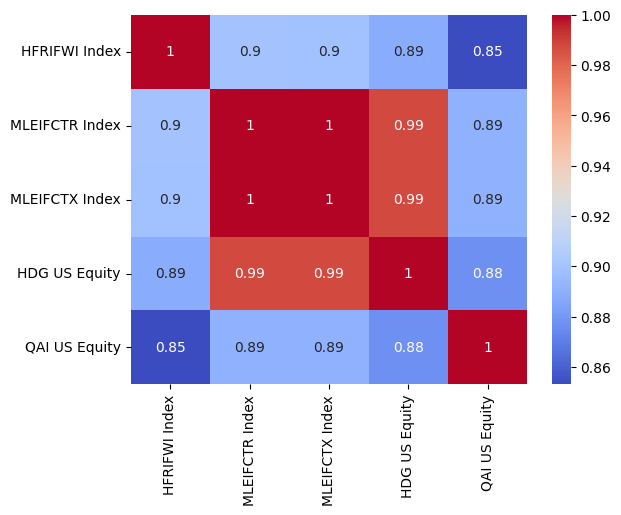

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
HFRIFWI Index,1.000000,0.899448,0.898916,0.888394,0.852999
MLEIFCTR Index,0.899448,1.000000,0.999909,0.987717,0.891204
MLEIFCTX Index,0.898916,0.999909,1.000000,0.987521,0.890948
HDG US Equity,0.888394,0.987717,0.987521,1.000000,0.876609
QAI US Equity,0.852999,0.891204,0.890948,0.876609,1.000000


In [198]:
corr_mat = hedge_funds.corr()
sns.heatmap(abs(corr_mat), annot=True, cmap='coolwarm')
plt.show()
corr_mat

The Merrill Lynch Factor Models - MLEIFCTR Index and MLEIFCTX Index have the highest correlations

QAI US Equity and HFR Fund Wghted Comp have the lowest correlations

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [209]:
def run_regression(hedge_fund_series, merrill_factors):
    X = sm.add_constant(merrill_factors)
    model = sm.OLS(hedge_fund_series, X).fit()
    return model

results = []
preds_with_intercept=[]
mean_preds_with_intercept = 0
for column in hedge_funds.columns:
    model = run_regression(hedge_funds[column], merrill_factors)
    # print(model.params)
    dictt = {'Fund': column}
    dictt['Intercept'] = model.params.iloc[0]
    print(f'{column} r_squared is {model.rsquared}')
    excess_returns = hedge_funds[column] - merrill_factors['SPY US Equity'] 
    tracking_error = excess_returns.std()
    print(f'{column} tracking_error is {tracking_error}')
    intercept_errors = excess_returns - dictt['Intercept']
    error_vol = intercept_errors.std()
    print(f'{column} error_vol is {error_vol}')
    for x in merrill_factors.columns:
        dictt[f'{x} Beta'] = model.params.loc[x]
    # print(dictt)
    results.append(dictt)

    if column == 'HFRIFWI Index':
        preds_with_intercept = model.fittedvalues
        mean_preds_with_intercept = preds_with_intercept.mean()
    
results_intercept = pd.DataFrame(results)
print(results_intercept)


HFRIFWI Index r_squared is 0.8396762289195674
HFRIFWI Index tracking_error is 0.028870618884751485
HFRIFWI Index error_vol is 0.028870618884751485
MLEIFCTR Index r_squared is 0.9373173322650579
MLEIFCTR Index tracking_error is 0.028477151162377815
MLEIFCTR Index error_vol is 0.02847715116237782
MLEIFCTX Index r_squared is 0.9369212619313169
MLEIFCTX Index tracking_error is 0.02852604674248751
MLEIFCTX Index error_vol is 0.028526046742487512
HDG US Equity r_squared is 0.9111908189799148
HDG US Equity tracking_error is 0.028324600978296068
HDG US Equity error_vol is 0.02832460097829607
QAI US Equity r_squared is 0.8363543199058767
QAI US Equity tracking_error is 0.030237987081210244
QAI US Equity error_vol is 0.030237987081210244
             Fund  Intercept  SPY US Equity Beta  USGG3M Index Beta  \
0   HFRIFWI Index   0.001235            0.036483           0.146336   
1  MLEIFCTR Index   0.000051            0.014802           0.434300   
2  MLEIFCTX Index  -0.000022            0.013657 

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [210]:
merrill_factors_with_intercept = sm.add_constant(merrill_factors)
# print(merrill_factors.shape)

for column in hedge_funds.columns:
    oos_preds = []
    oos_targets = []
    for t in range(60, len(hedge_funds)):
        Y_sample = hedge_funds[column].iloc[t-60:t]
        X_sample = merrill_factors_with_intercept.iloc[t-60:t]
        # X = sm.add_constant(X_sample)
        # print(X.iloc[0])
        # print(X.type)
        model = sm.OLS(Y_sample, X_sample).fit()
        # print(model.params)
        # X_oos = pd.concat([pd.DataFrame({'const': 1.000000}), merrill_factors.iloc[t]], axis=0).reset_index(drop=True)
        X_oos = merrill_factors_with_intercept.iloc[t]
        # print(X_oos)
        # print(X_oos.shape)
        Y_oos = model.predict(X_oos)
        # print(Y_oos)
        oos_preds.append(Y_oos.iloc[0])
        oos_targets.append(hedge_funds[column].iloc[t])

    predictions = np.array(oos_preds)
    targets = np.array(oos_targets)

    r_squared_oos = 1 - np.sum((targets - predictions)**2) / np.sum((targets - np.mean(targets))**2)
    print(f"Out-of-sample R-squared for {column}: {r_squared_oos}")


Out-of-sample R-squared for HFRIFWI Index: 0.7994295353835995
Out-of-sample R-squared for MLEIFCTR Index: 0.9153441610235722
Out-of-sample R-squared for MLEIFCTX Index: 0.9138092343852102
Out-of-sample R-squared for HDG US Equity: 0.9143979759694005
Out-of-sample R-squared for QAI US Equity: 0.8970368311715177


## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [211]:
results = []
preds_no_intercept = []
mean_preds_no_intercept = 0
for column in hedge_funds.columns:
    model = sm.OLS(hedge_funds[column], merrill_factors).fit()
    # model = run_regression(hedge_funds[column], merrill_factors)
    # print(model.params)
    dictt = {'Fund': column}
    print(f'{column} r_squared is {model.rsquared}')
    # excess_returns = hedge_funds[column] - merrill_factors['SPY US Equity'] 
    # tracking_error = excess_returns.std()
    # print(f'{column} tracking_error is {tracking_error}')
    for x in merrill_factors.columns:
        dictt[f'{x} Beta'] = model.params.loc[x]
    # print(dictt)
    results.append(dictt)

    if column == 'HFRIFWI Index':
        preds_no_intercept = model.fittedvalues
        mean_preds_no_intercept = preds_no_intercept.mean()
    
results_no_intercept = pd.DataFrame(results)
print(results_no_intercept)


HFRIFWI Index r_squared is 0.8451621444530085
MLEIFCTR Index r_squared is 0.9394337398397951
MLEIFCTX Index r_squared is 0.9388789228643016
HDG US Equity r_squared is 0.9107360507435924
QAI US Equity r_squared is 0.835994534269765
             Fund  SPY US Equity Beta  USGG3M Index Beta  EEM US Equity Beta  \
0   HFRIFWI Index            0.050667           0.499336            0.080866   
1  MLEIFCTR Index            0.015387           0.448884            0.069982   
2  MLEIFCTX Index            0.013402           0.384939            0.070259   
3   HDG US Equity           -0.000824           0.153329            0.065210   
4   QAI US Equity            0.114982           0.497382            0.065991   

   EFA US Equity Beta  EUO US Equity Beta  IWM US Equity Beta  
0            0.079146            0.031373            0.142651  
1            0.138761            0.031738            0.128140  
2            0.139973            0.031032            0.127218  
3            0.150744           

In [214]:
print(f'Mean of the fitted values with intercept is {mean_preds_with_intercept} and without is {mean_preds_no_intercept}')
correlation_with_intercept = np.corrcoef(preds_with_intercept, hedge_funds[column])[0, 1]
correlation_no_intercept = np.corrcoef(preds_no_intercept, hedge_funds[column])[0, 1]
print(f'Coefficient of correlation with intercept is {correlation_with_intercept} and without is {correlation_no_intercept}')

Mean of the fitted values with intercept is 0.004024576917345148 and without is 0.00329521127566328
Coefficient of correlation with intercept is 0.8898741773559892 and without is 0.8925843645156568


# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***